# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [4]:
!pip install sweetviz 
#uncomment the above if you need to install the library 
!pip install auto-sklearn
#uncomment the above if you need to install the library 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.3 MB 46.2 MB/s 
     |████████████████████████████████| 260 kB 67.6 MB/s 
     |████████████████████████████████| 4.4 MB 36.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 46 kB 5.3 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=c275aed0493278a8ac8e991fc2f5b752f9d0b8304dfc61e8360becea545a86e4
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/ca63ad74b90273f9a682028d187645a42dce5c5255228d46c8
 

In [5]:
# !pip install --upgrade scipy

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Standard Bank/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Standard Bank/test.csv')

# Part One

## EDA

In [10]:
print("Train Dataset Size:", train.shape)
print("Test Dataset Size:", test.shape)

Train Dataset Size: (614, 13)
Test Dataset Size: (367, 12)


In [11]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
# Datatypes present in train dataset
print("Train Dataset")
train.dtypes

Train Dataset


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
# Datatypes present in test dataset
print("Test Dataset")
test.dtypes

Test Dataset


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [16]:
# Describe train data
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
# Describe test data
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [18]:
# Train dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
# Test dataset info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [20]:
# Let's check for null values in train dataset
print("Train Dataset")
train.isnull().sum()

Train Dataset


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# Let's check for null values in test dataset
print("Test Dataset")
test.isnull().sum()

Test Dataset


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [22]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['LoanAmount'].fillna(round(train['LoanAmount'].mean(),2),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [23]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(round(test['LoanAmount'].mean(),2),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [24]:
duplicate_train = train[train.duplicated()]
duplicate_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [25]:
duplicate_test = test[test.duplicated()]
duplicate_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


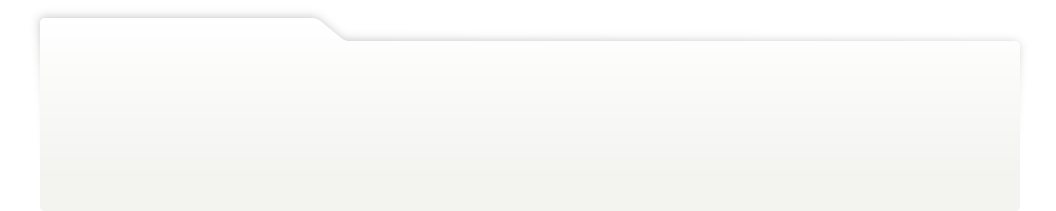
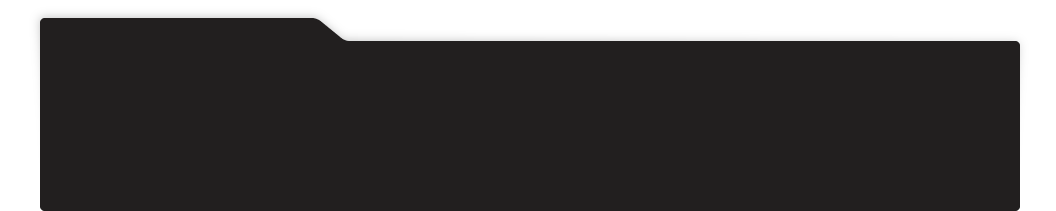
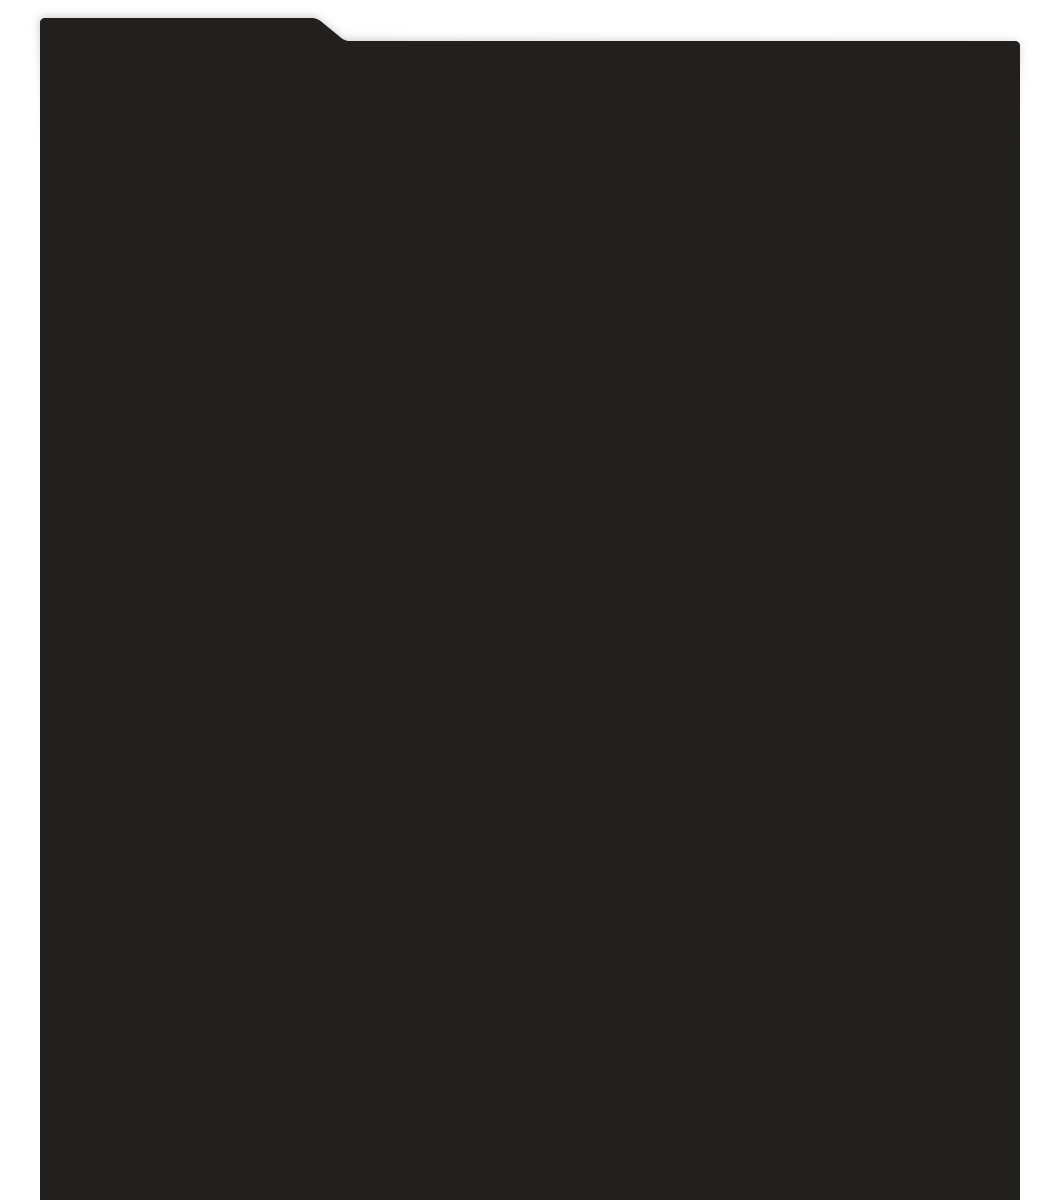
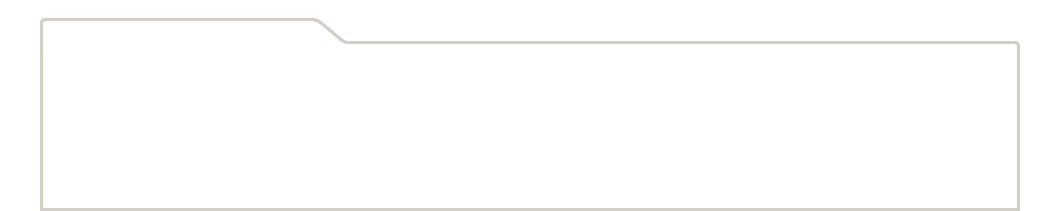
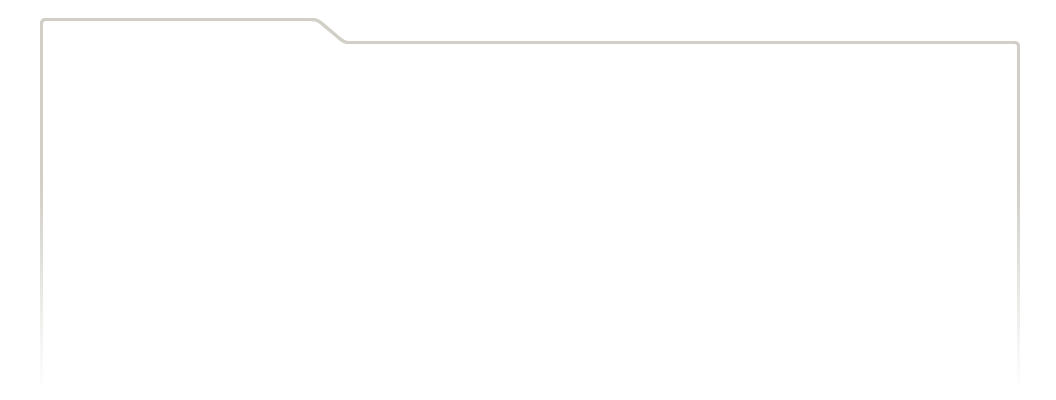
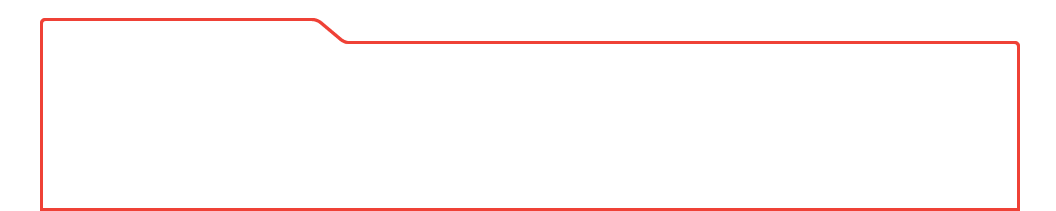
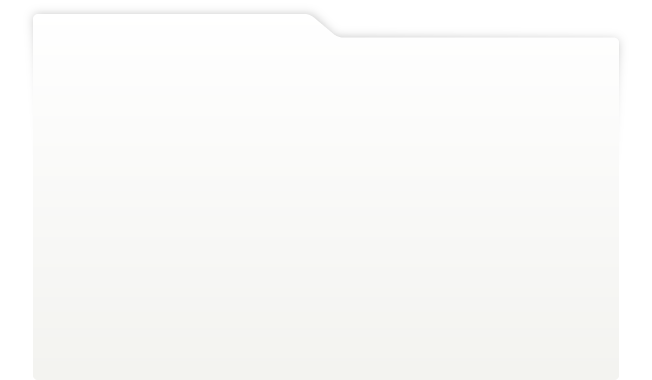
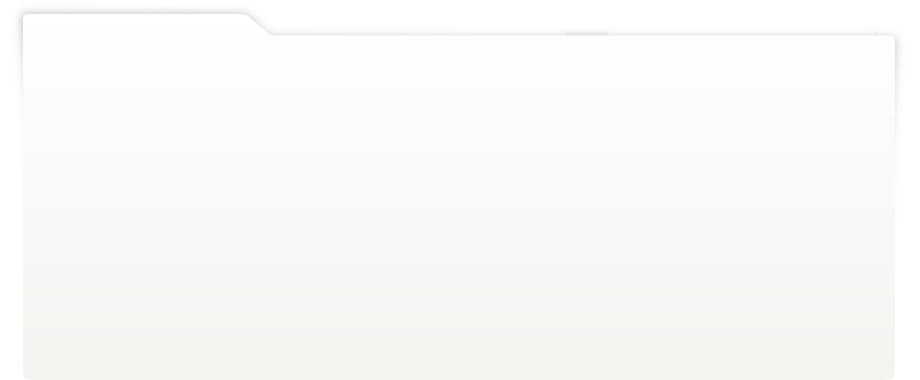
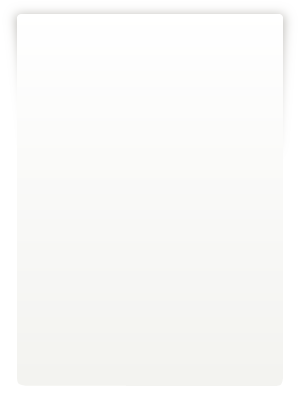
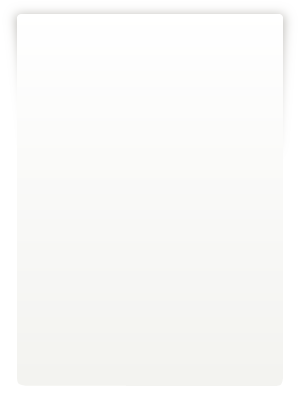
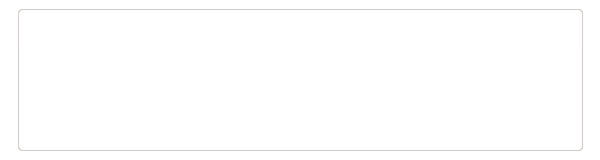
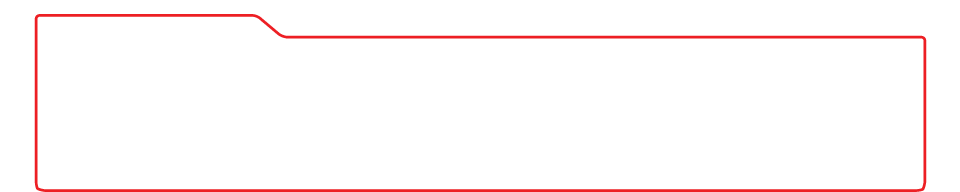
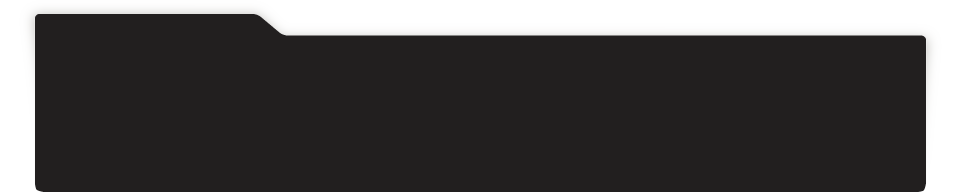
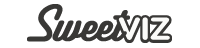
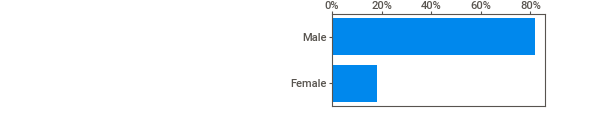
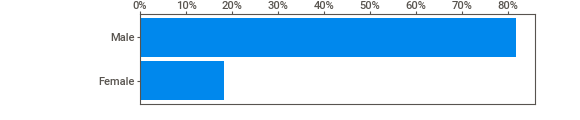
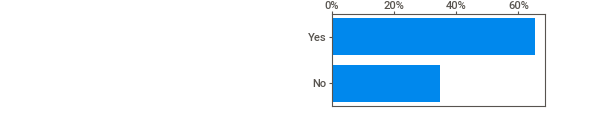
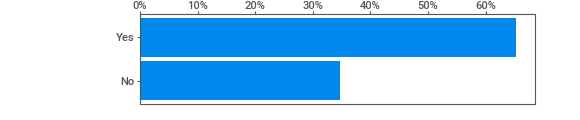
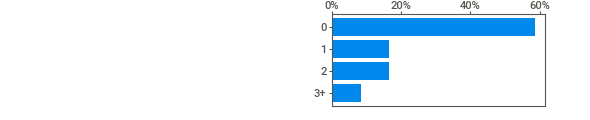
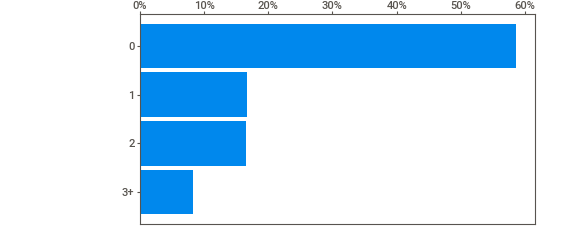
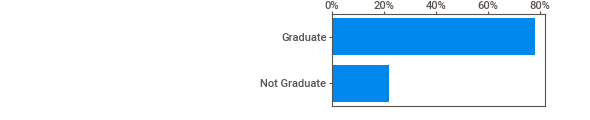
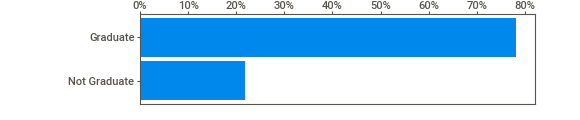
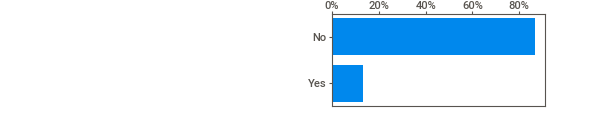
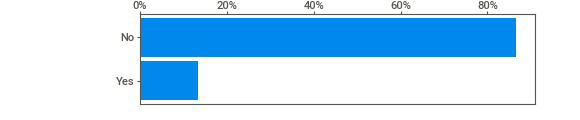
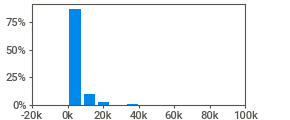
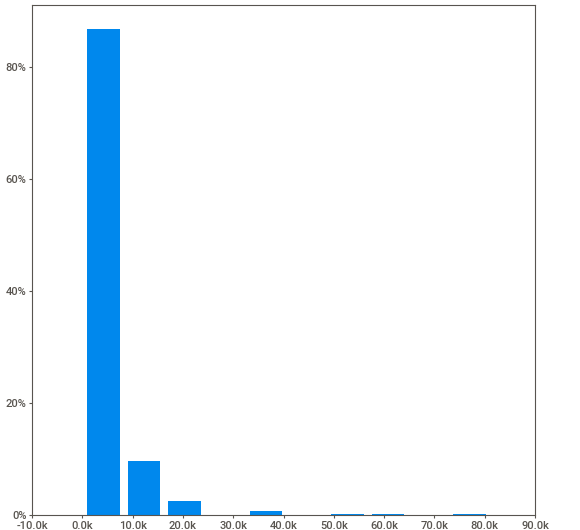
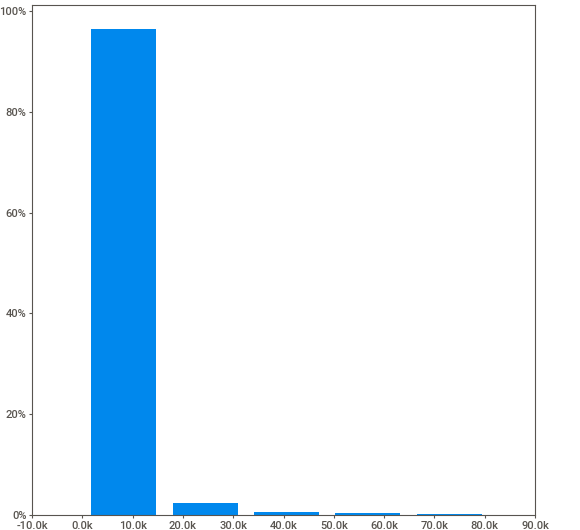
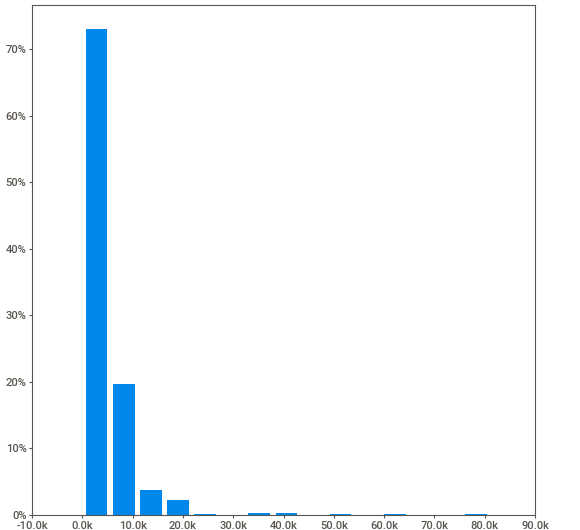
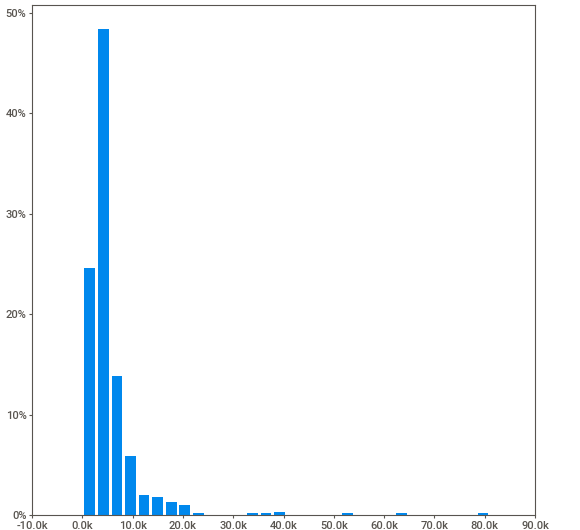
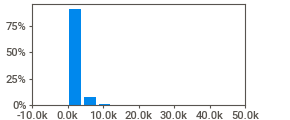
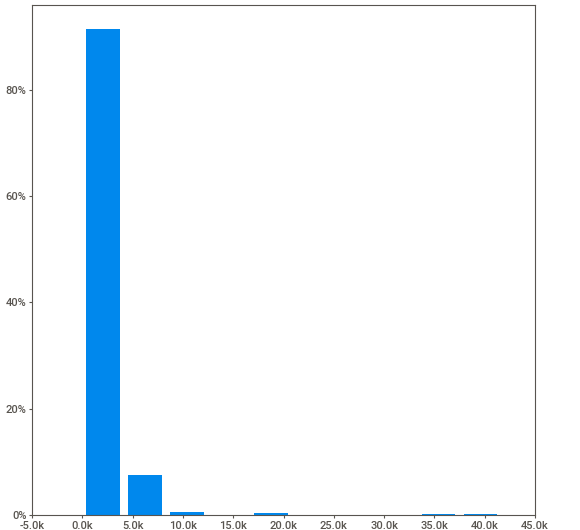
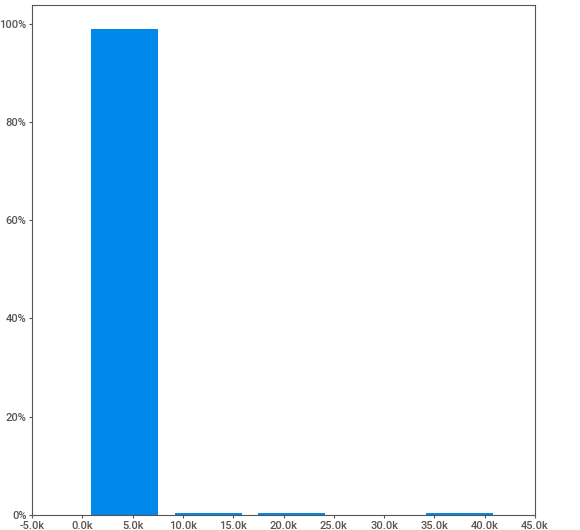
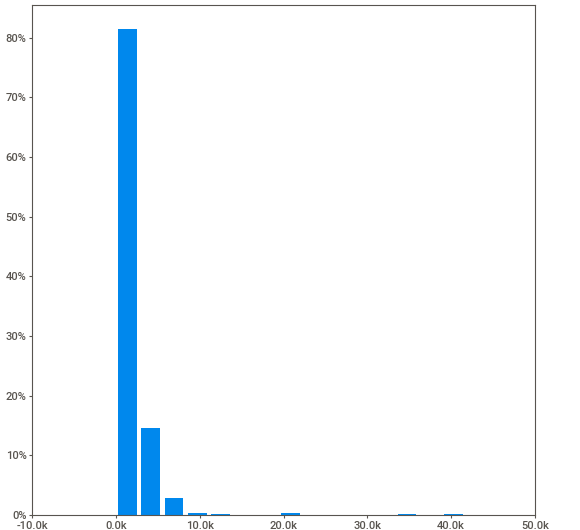
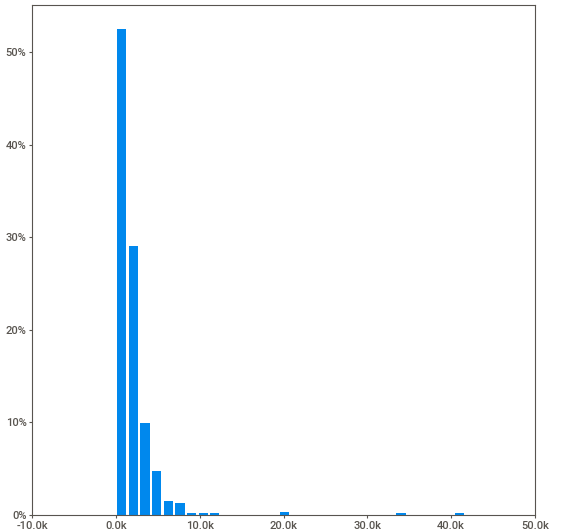
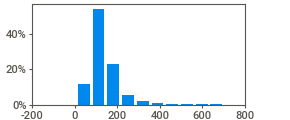
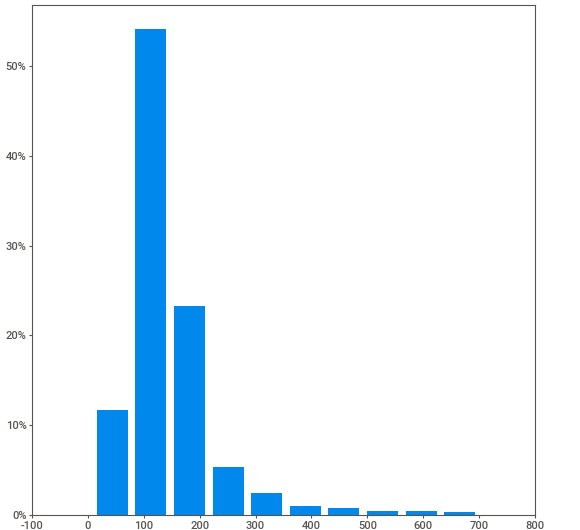
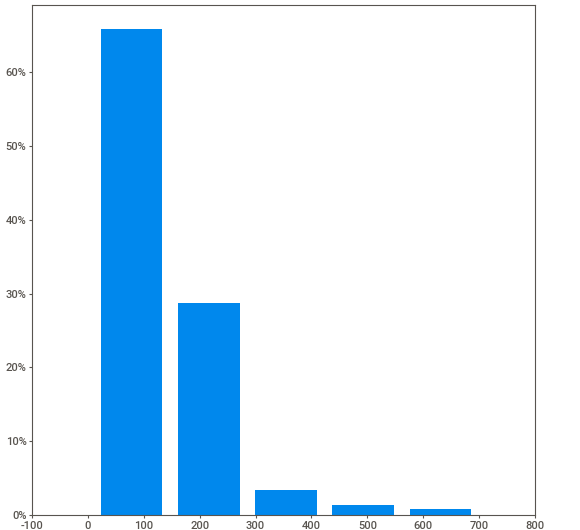
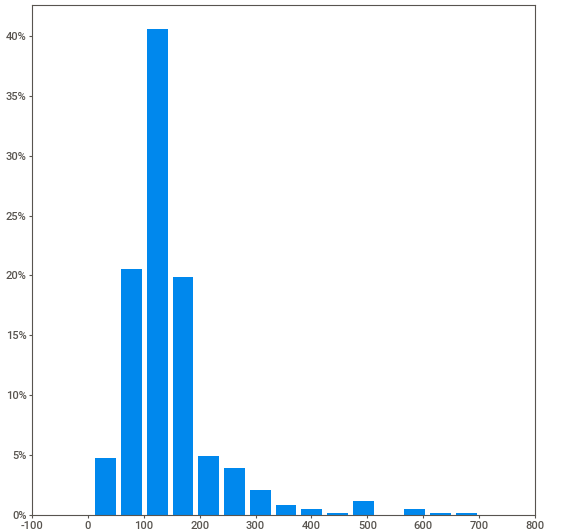
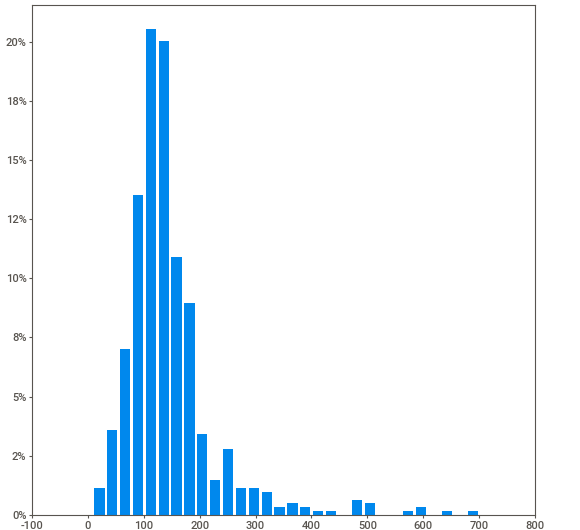
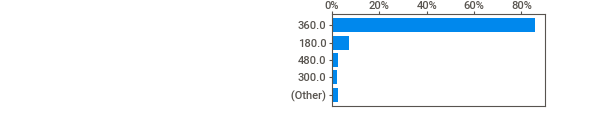
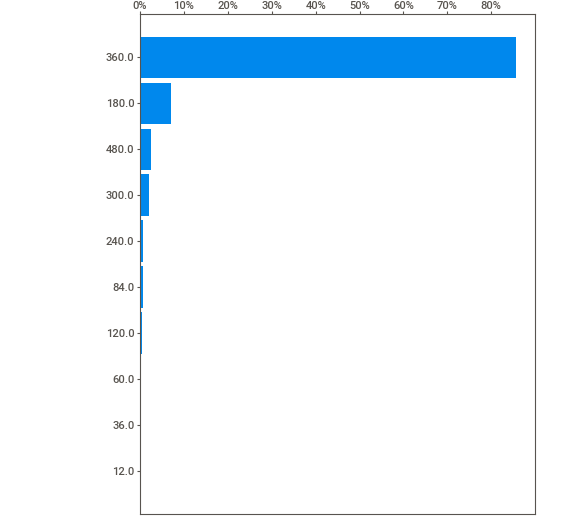
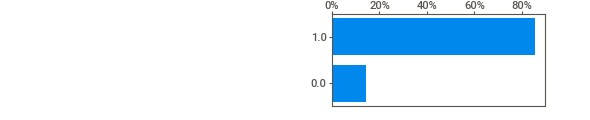
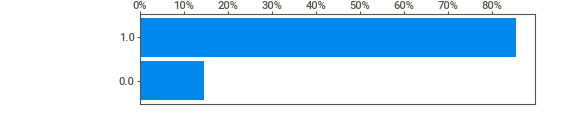
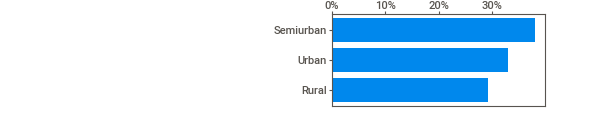
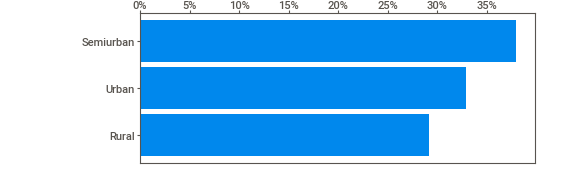
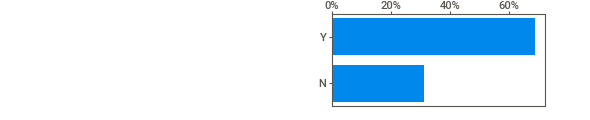
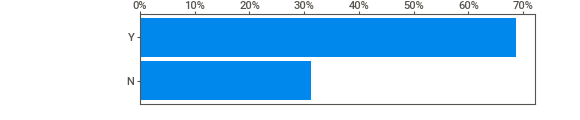
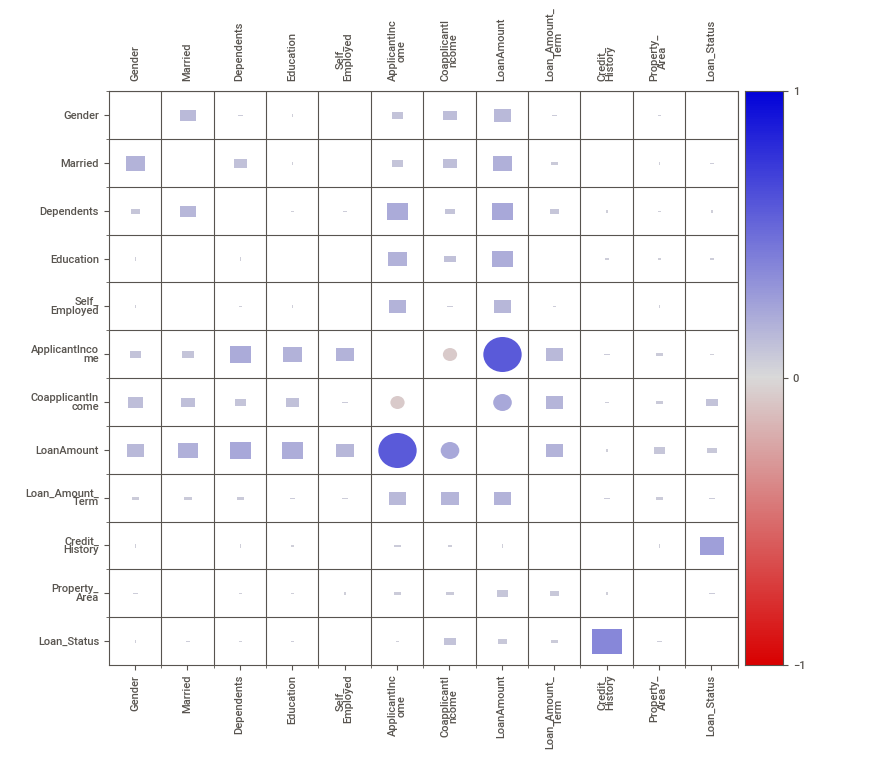
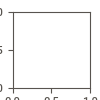

In [26]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Your Own EDA 


In [27]:
# Loan Status
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

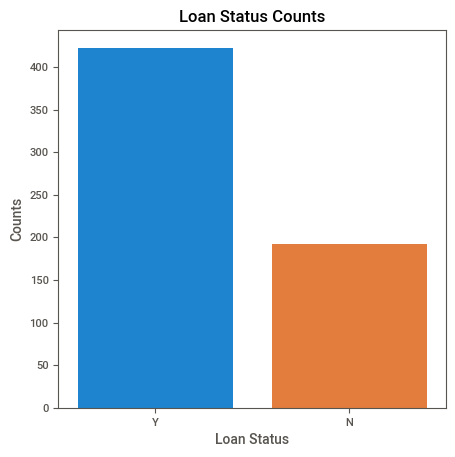

In [28]:
# create a countplot of above data
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status', data=train)
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.title('Loan Status Counts')
plt.grid(False)
plt.show()

As you can see that our data is not a balanced dataset.

In [29]:
# Gender
train.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [30]:
# Gender vs Loan Status
train.groupby(['Gender','Loan_Status'])['Loan_Status'].count()

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              155
        Y              347
Name: Loan_Status, dtype: int64

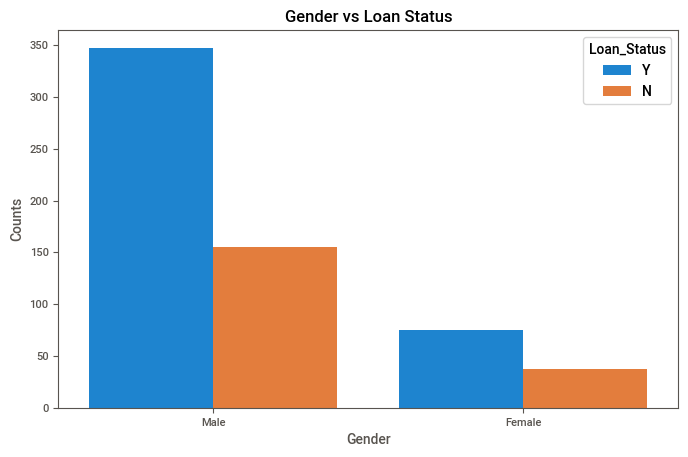

In [31]:
# Let's plot above data
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=train, hue='Loan_Status')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Gender vs Loan Status')
plt.grid(False)
plt.show()

In [32]:
# Dependents
train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

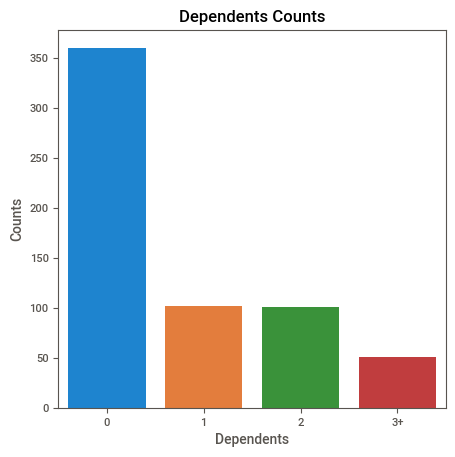

In [33]:
# create a countplot of above data
plt.figure(figsize=(5,5))
sns.countplot(x='Dependents', data=train)
plt.xlabel('Dependents')
plt.ylabel('Counts')
plt.title('Dependents Counts')
plt.grid(False)
plt.show()

In [34]:
# Self_Employed
train.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [35]:
train.groupby(['Self_Employed'])['ApplicantIncome'].mean().round(2)

Self_Employed
No     5098.68
Yes    7380.82
Name: ApplicantIncome, dtype: float64

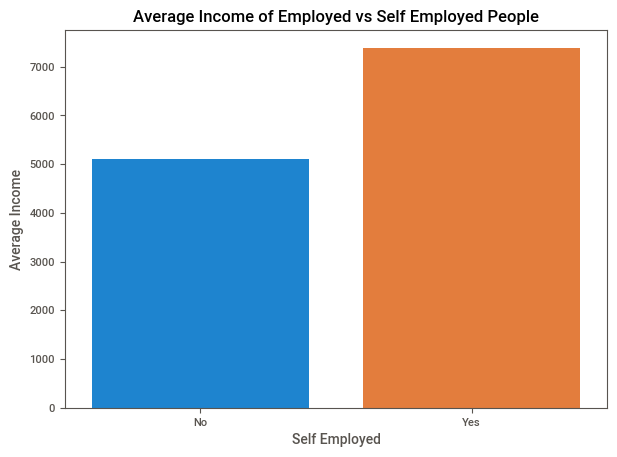

In [36]:
# Let's plot above data
plt.figure(figsize=(7,5))
sns.barplot(x='Self_Employed', y='ApplicantIncome', data=train, estimator=np.mean, ci=None)
plt.xlabel('Self Employed')
plt.ylabel('Average Income')
plt.title('Average Income of Employed vs Self Employed People')
plt.grid(False)
plt.show()

In [37]:
# Credit_History
train.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [38]:
82/89

0.9213483146067416

In [39]:
train.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N              110
                Y              415
Name: Loan_Status, dtype: int64

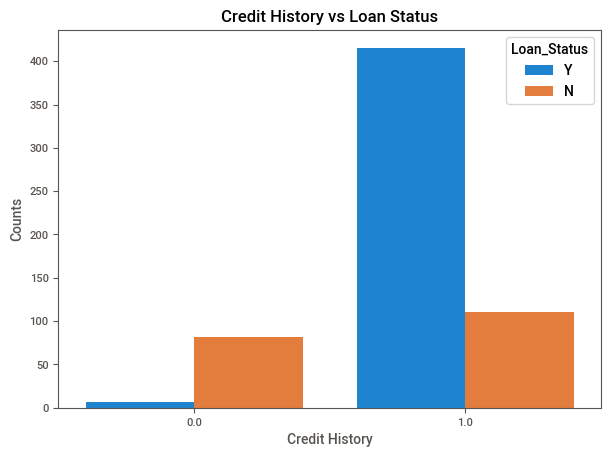

In [40]:
# Let's plot above data
plt.figure(figsize=(7,5))
sns.countplot(x='Credit_History', data=train, hue='Loan_Status')
plt.xlabel('Credit History')
plt.ylabel('Counts')
plt.title('Credit History vs Loan Status')
plt.grid(False)
plt.show()

In [41]:
# ApplicantIncome vs LoanAmount
correlation = train.ApplicantIncome.corr(train.LoanAmount)
print("Correlation between Applicant Income and Loan Amount is:", round(correlation,2))

Correlation between Applicant Income and Loan Amount is: 0.57


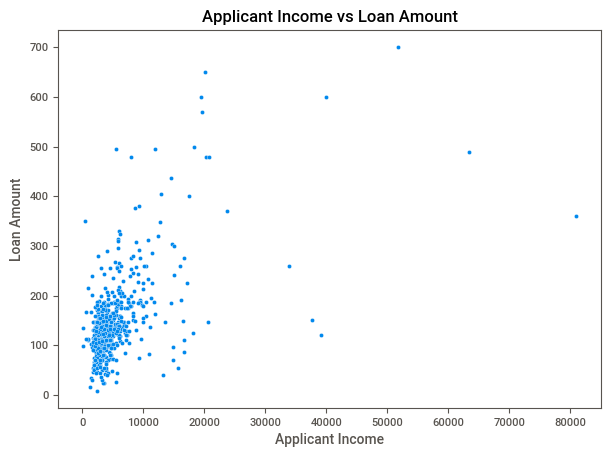

In [42]:
# Let's plot above data
plt.figure(figsize=(7,5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount')
plt.show()

In [43]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187829,-0.059383,0.011134
LoanAmount,0.565620,0.187829,1.000000,0.036475,-0.001430
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001430,-0.004705,1.000000


In [44]:
192/614

0.3127035830618892

## Your answers:

1. There are total 614 records and 13 fields in Train data and 367 records and 12 fields in test data. There are 8 fields with categorical datatype and 5 fields with numerical datatype in train dataset. For test dataset, there are 7 fields with categorical datatype and 5 fields with numerical datatype. 

2. For train data there are missing values in columns [Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History] and for test data there are missing values in columns [Gender, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History]. There are no duplicate values in train or test data.

3. There is a huge differnce in the Loan Status values as the 'Y' values are 422 - 68.72% and 'N' values are 192 - 31.27%. So our data is imbalanced data.

4. There are total of 502 Males and 112 Females in our data. Out of the 502 Males, 347 - 69.12% are with Loan Status: 'Y' and 155 - 30.87% are with Loan Status: 'N' and out of 112 Females, 75 - 66.96% are with Loan Status: 'Y' and 37 - 33.03% are with Loan Status: 'N'. So there is nearly the same proportion considering their individual counts in dataset.

5. Out of the total 614 applicants, 360 - 58.63% have no dependents and 254 - 41.36% have dependents based on the dataset.

6. The average income of Self Employed applicants is 7380.82 and for employed applicants it is 5098.68.

7. There are total of 525 - 85.50% applicants with a Credit History and 89 - 14.49% with No Credit History. Out of 525 applicants with a Credit History, 415 - 79.04% have Loan Status: 'Y' and 110 - 20.95% have Loan Status: 'N'. Out of the 89 applicants with no Credit History, 7 - 7.86% have Loan Status: 'Y' and 82 - 92.13% have Loan Status: 'N'. So after comparing these values we can say that applicants with No Credit History are more likely to default. 

8. There is a positive correlation of 0.57 between Applicant Income and Loan Amount.

9.

10.

# Part Two

## Auto ML wth autosklearn


In [45]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [46]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [47]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [48]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  1]
 [25 79]]


## Bespoke ML sklearn

### Data Preparation

In [49]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [50]:
# Matrix of features
X = train.drop(['Loan_ID','Loan_Status'], axis=1)

In [51]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.00,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.00,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.00,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.00,360.0,1.0,Urban


In [52]:
# Label encode the object datatype columns
le = LabelEncoder()

X['Gender'] = le.fit_transform(X['Gender'])
X['Married'] = le.fit_transform(X['Married'])
X['Dependents'] = le.fit_transform(X['Dependents'])
X['Education'] = le.fit_transform(X['Education'])
X['Self_Employed'] = le.fit_transform(X['Self_Employed'])
X['Property_Area'] = le.fit_transform(X['Property_Area'])

In [53]:
# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

In [54]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Scale the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

X_test_scaled = ss.transform(X_test)

In [56]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [57]:
# train
clf = LogisticRegression() #change model here
clf.fit(X_train_scaled, y_train)

# predict
predictions_clf = clf.predict(X_test_scaled)

In [58]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.7886178861788617


In [59]:
print(confusion_matrix(predictions_clf, y_test))

[[18  1]
 [25 79]]


### Traditional Way

As we know that our data is imbalanced w.r.t. the target variable, we will use SMOTE for our analysis.

In [60]:
print('Before SMOTE, Count of class 1 : {}'.format(sum(y_train==1)))
print('Before SMOTE, Count of class 0 : {}'.format(sum(y_train==0)))

Before SMOTE, Count of class 1 : 342
Before SMOTE, Count of class 0 : 149


In [61]:
# import SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

In [62]:
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train.ravel())

In [63]:
print('After Oversampling the shape of X_train_sm : {}'.format(X_train_sm.shape))
print('After Oversampling the shape of y_train_sm : {}'.format(y_train_sm.shape))

After Oversampling the shape of X_train_sm : (684, 11)
After Oversampling the shape of y_train_sm : (684,)


In [64]:
print('After SMOTE, Count of class 1 : {}'.format(sum(y_train_sm==1)))
print('After SMOTE, Count of class 0 : {}'.format(sum(y_train_sm==0)))

After SMOTE, Count of class 1 : 342
After SMOTE, Count of class 0 : 342


### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
# fit the training data
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [67]:
logreg.score(X_train_sm, y_train_sm)

0.7090643274853801

In [68]:
# predict on the test data
logreg_predict = logreg.predict(X_test_scaled)

In [69]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_predict))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, logreg_predict)*100)

Confusion Matrix:
 [[19 24]
 [ 7 73]]
Accuracy Score: 74.79674796747967


### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [71]:
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [72]:
dt.score(X_train_sm, y_train_sm)

1.0

In [73]:
dt_predict = dt.predict(X_test_scaled)

In [76]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predict))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, dt_predict)*100)

Confusion Matrix:
 [[20 23]
 [18 62]]
Accuracy Score: 66.66666666666666


### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [79]:
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [80]:
rfc.score(X_train_sm, y_train_sm)

1.0

In [81]:
rfc_predict = rfc.predict(X_test_scaled)

In [82]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_predict))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, rfc_predict)*100)

Confusion Matrix:
 [[19 24]
 [ 7 73]]
Accuracy Score: 74.79674796747967


### XGBoost

In [83]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()

In [84]:
xgbc.fit(X_train_sm, y_train_sm)

XGBClassifier()

In [85]:
xgbc.score(X_train_sm, y_train_sm)

0.8859649122807017

In [86]:
xgbc_predict = xgbc.predict(X_test_scaled)

In [87]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, xgbc_predict))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, xgbc_predict)*100)

Confusion Matrix:
 [[19 24]
 [ 6 74]]
Accuracy Score: 75.60975609756098
